In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

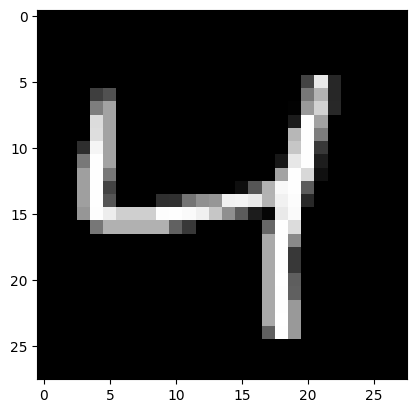

In [ ]:
single_image= X_train[2]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0

In [ ]:
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()


0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[5]

2

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)

In [ ]:
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

In [ ]:
single_image = X_train[200]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

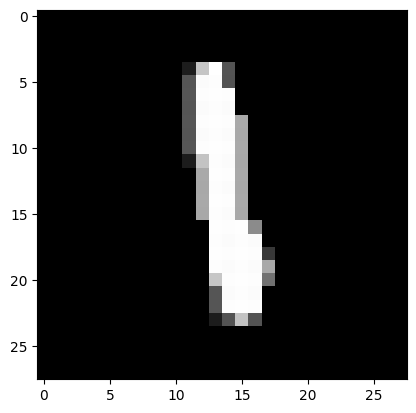

In [ ]:
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters =32 , kernel_size =(5,5),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(4,4)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                73792     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 75274 (294.04 KB)
Trainable params: 75274 (294.04 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=10,batch_size=52, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/10
1154/1154 [==============================] - 24s 20ms/step - loss: 0.2087 - accuracy: 0.9404 - val_loss: 0.0663 - val_accuracy: 0.9788
Epoch 2/10
1154/1154 [==============================] - 31s 26ms/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.0547 - val_accuracy: 0.9813
Epoch 3/10
1154/1154 [==============================] - 25s 22ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0391 - val_accuracy: 0.9868
Epoch 4/10
1154/1154 [==============================] - 22s 19ms/step - loss: 0.0386 - accuracy: 0.9881 - val_loss: 0.0455 - val_accuracy: 0.9848
Epoch 5/10
1154/1154 [==============================] - 29s 25ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 6/10
1154/1154 [==============================] - 35s 31ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0395 - val_accuracy: 0.9869
Epoch 7/10
1154/1154 [==============================] - 41s 35ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0419 -

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.208695,0.940367,0.066294,0.9788
1,0.064748,0.981150,0.054661,0.9813
2,0.047904,0.985300,0.039108,0.9868
3,0.038586,0.988117,0.045501,0.9848
4,0.032699,0.989817,0.037694,0.9873


Archana 3007


<Axes: >

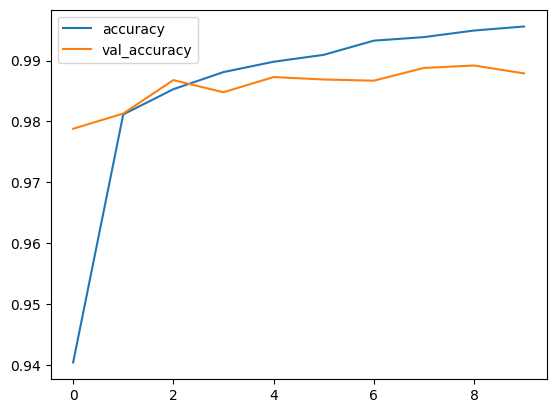

In [ ]:
print("Archana 3007")
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
# print("Archana 3007")
metrics[['loss','val_loss']].plot

In [ ]:
xtestpred = np.argmax(model.predict(X_test_scaled),axis=1)

313/313 [==============================] - 2s 7ms/step


In [ ]:
print(confusion_matrix(y_test,xtestpred))

[[ 977    1    0    0    0    0    2    0    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    2 1025    0    1    0    0    3    0    0]
 [   0    1    1 1000    0    5    0    2    1    0]
 [   0    1    0    0  978    0    1    0    0    2]
 [   2    0    0    8    0  878    2    0    2    0]
 [   7    4    1    0    2    2  942    0    0    0]
 [   0    5    7    0    0    1    0 1011    1    3]
 [   6    0    4    0    1    0    4    1  954    4]
 [   0    4    1    0   11    4    0    6    3  980]]


In [ ]:
print(classification_report(y_test,xtestpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
## <---------------  prediction for single input --------------------->

In [ ]:
img = image.load_img('ttwo.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 72ms/step


In [ ]:

print(x_single_prediction)

[3]


Archana 3007


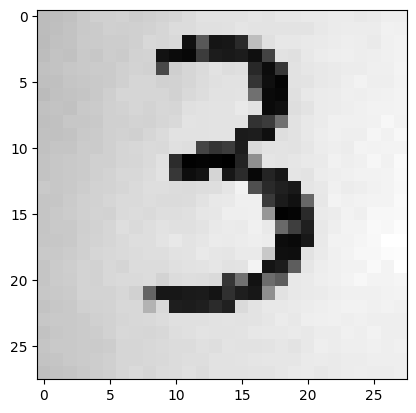

In [ ]:
print("Archana 3007")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')